In [2]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [3]:

df = pd.read_csv('insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

#Lets look into top few rows and columns in the dataset
df.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Missing value in the dataset')

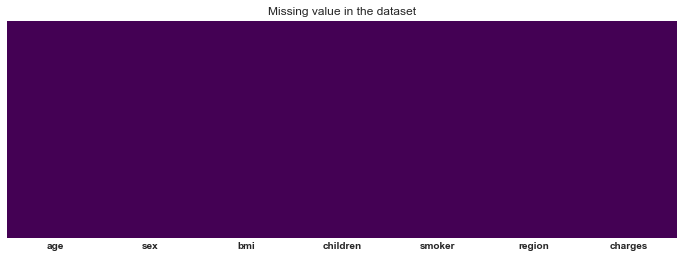

In [5]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

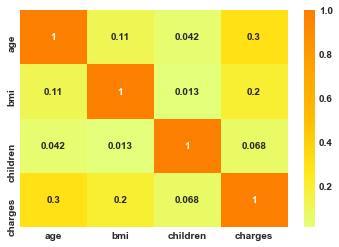

In [6]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

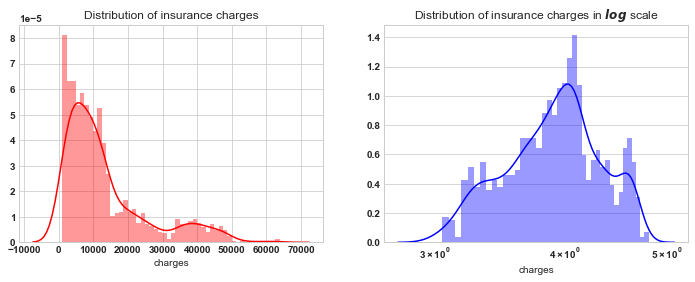

In [8]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ scale')
ax.set_xscale('log')

Text(0.5, 1.0, 'Box plot of charges vs children')

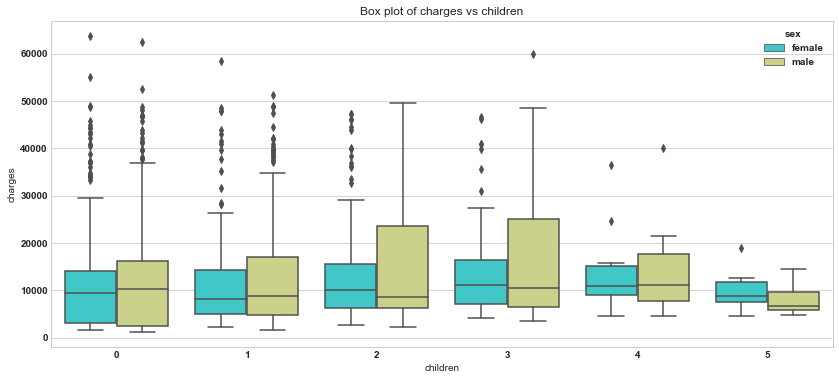

In [9]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children')

In [10]:
df.groupby('children').agg(['mean','min','max'])['charges']

/var/folders/w0/vnwsppxs2lx_bt03377nr5k40000gn/T/ipykernel_71685/2881019953.py:1: FutureWarning: ['sex', 'smoker', 'region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('children').agg(['mean','min','max'])['charges']


,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


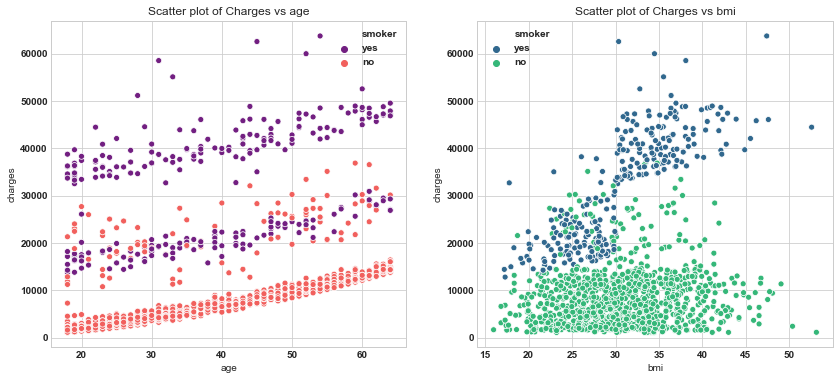

In [11]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png')

In [20]:
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [21]:
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [22]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)

#df['charges'] = y_bc  
# it did not perform better for this model, so log transform is used
ci,lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

In [23]:
df.head(25)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [25]:
df_encode['charges'] = np.log(df_encode['charges'])

In [27]:
df_encode.head(25)

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,9.734176,0,0,0,0,0,0,1,0,0,1
1,18,33.770,7.453302,1,1,0,0,0,0,0,0,1,0
2,28,33.000,8.400538,1,0,0,1,0,0,0,0,1,0
3,33,22.705,9.998092,1,0,0,0,0,0,0,1,0,0
4,32,28.880,8.260197,1,0,0,0,0,0,0,1,0,0
5,31,25.740,8.231275,0,0,0,0,0,0,0,0,1,0
6,46,33.440,9.016827,0,1,0,0,0,0,0,0,1,0
7,37,27.740,8.893093,0,0,0,1,0,0,0,1,0,0
8,37,29.830,8.765054,1,0,1,0,0,0,0,0,0,0
9,60,25.840,10.272397,0,0,0,0,0,0,0,1,0,0


In [28]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [29]:
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [30]:
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [31]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,7.059171,7.059171
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013517,0.013517
3,theta_3,OHE_male,-0.067767,-0.067767
4,theta_4,OHE_1,0.149457,0.149457
5,theta_5,OHE_2,0.272919,0.272919
6,theta_6,OHE_3,0.244095,0.244095
7,theta_7,OHE_4,0.523339,0.523339
8,theta_8,OHE_5,0.466030,0.466030
9,theta_9,OHE_yes,1.550481,1.550481


In [32]:
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.18729622322981962
R square obtain for normal equation method is : 0.779568754505531


In [33]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.18729622322981904
R square obtain for scikit learn library is : 0.7795687545055316


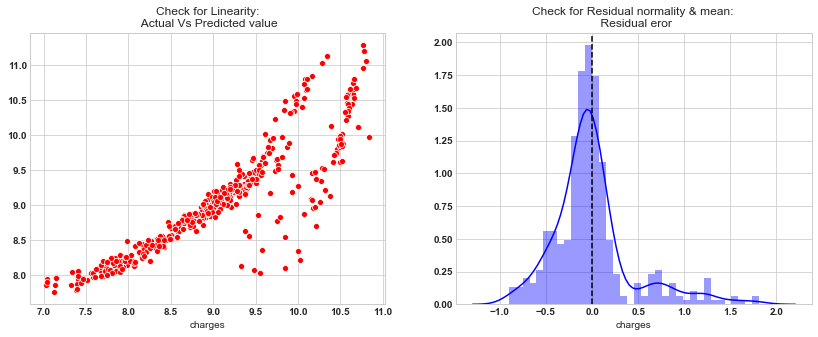

In [35]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

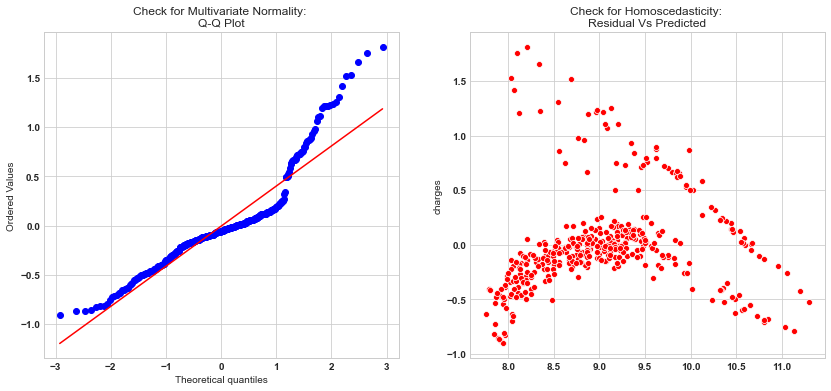

In [39]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [40]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.536561945911133